# Data Preparation - Airbnb London

In [1]:
import os
import json
import shutil
import zipfile
from zipfile import ZipFile
import pandas as pd
import numpy as np
import arcgis
from arcgis.gis import GIS
from arcgis.mapping import WebMap, WebScene
from arcgis.features import FeatureLayer
from arcgis.features import GeoAccessor, GeoSeriesAccessor
import arcpy 
from arcpy import env
from IPython.display import display
from IPython.display import Image
from IPython.core.display import HTML
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# https://developers.arcgis.com/python/guide/working-with-different-authentication-schemes/
# gis = GIS() # Connect to ArcGIS Online as an anonymous user
gis = GIS("home")
print("Successfully logged in as: " + gis.properties.user.username)

Successfully logged in as: sango.fon


## "Unforgettable trips start with Airbnb."
### "Find adventures nearby or in faraway places and access unique homes, experiences, and places around the world."
#### https://www.airbnb.com/ 

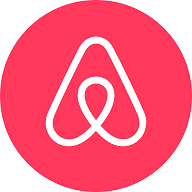


In [3]:
# Create a folder
os.mkdir('/arcgis/home/london_airbnb')

In [4]:
# Create a file geodatabase

arcpy.CreateFileGDB_management('/arcgis/home/london_airbnb', 'london_airbnb_gdb.gdb')

<Result '/arcgis/home/london_airbnb/london_airbnb_gdb.gdb'>

In [5]:
# Download and open the data in a dataframe
# Airbnb data: http://insideairbnb.com/get-the-data.html
pd.set_option("display.max_columns", None)
# df = pd.read_csv('/arcgis/home/san_diego_airbnb/listings.csv.gz')
df = pd.read_csv('http://data.insideairbnb.com/united-kingdom/england/london/2021-12-07/data/listings.csv.gz')
# Should include 9249 rows
df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20211207182339,2021-12-09,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,100%,85%,f,https://a0.muscache.com/im/users/54730/profile...,https://a0.muscache.com/im/users/54730/profile...,LB of Islington,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Islington, Greater London, United Kingdom",Islington,NaN,51.568610,-0.112700,Private room in rental unit,Private room,2,NaN,1 shared bath,1.0,NaN,"[""Hot water"", ""Heating"", ""Coffee maker"", ""Buil...",$65.00,1,29,1.0,1.0,29.0,29.0,1.0,29.0,NaN,t,26,56,86,361,2021-12-09,22,1,1,2010-08-18,2021-11-21,4.86,4.80,4.85,4.80,4.90,4.65,4.75,NaN,f,2,1,1,0,0.16
1,15400,https://www.airbnb.com/rooms/15400,20211207182339,2021-12-09,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,Philippa,2009-12-05,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",within a day,67%,50%,f,https://a0.muscache.com/im/users/60302/profile...,https://a0.muscache.com/im/users/60302/profile...,Chelsea,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"London, United Kingdom",Kensington and Chelsea,NaN,51.487800,-0.168130,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Hot water"", ""Heating"", ""Coffee maker"", ""TV w...",$75.00,3,50,3.0,3.0,50.0,50.0,3.0,50.0,NaN,t,0,0,0,4,2021-12-09,89,0,0,2009-12-21,2020-03-16,4.79,4.84,4.88,4.87,4.82,4.93,4.73,NaN,f,1,1,0,0,0.61
2,17402,https://www.airbnb.com/rooms/17402,20211207182339,2021-12-09,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564,https://www.airbnb.com/users/show/67564,Liz,2010-01-04,"Brighton and Hove, England, United Kingdom",We are Liz and Jack. We manage a number of ho...,within an hour,80%,70%,f,https://a0.muscache.com/im/users/67564/profile...,https://a0.muscache.com/im/users/67564/profile...,Fitzrovia,18.0,18.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"London, Fitzrovia, United Kingdom",Westminster,NaN,51.521950,-0.140940,Entire rental unit,Entire home/apt,6,NaN,2 baths,3.0,3.0,"[""Hot water"", ""Heating"", ""Coffee maker"", ""Iron...",$265.00

In [6]:
# Let's look at the columns - there are 74...
for a,b,c,d in zip(df.columns[::4], df.columns[1::4],df.columns[2::4], df.columns[3::4]):
    print("{:<30}{:<30}{:<30}{:<}".format(a,b,c,d))

id                            listing_url                   scrape_id                     last_scraped
name                          description                   neighborhood_overview         picture_url
host_id                       host_url                      host_name                     host_since
host_location                 host_about                    host_response_time            host_response_rate
host_acceptance_rate          host_is_superhost             host_thumbnail_url            host_picture_url
host_neighbourhood            host_listings_count           host_total_listings_count     host_verifications
host_has_profile_pic          host_identity_verified        neighbourhood                 neighbourhood_cleansed
neighbourhood_group_cleansed  latitude                      longitude                     property_type
room_type                     accommodates                  bathrooms                     bathrooms_text
bedrooms                      beds             

In [7]:
# Let's look at the column data types
pd.set_option("display.max_rows", None)
df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                               

## 3 - Data Preparation - select data; correct, modify attributes; generate new attributes

In [8]:
# Let's cleanup some of this data a bit...
# Change these percentages to numeric values
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype('float') / 100.0
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0
# Change price to a numeric value
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
# Change text to numeric value
df["host_is_superhost"] = df["host_is_superhost"].replace('f', 0)
df["host_is_superhost"] = df["host_is_superhost"].replace('t', 1)

In [9]:
# Let's select some of the columns for our analyses: regression, forest-based classification and regression, and density-based clustering
# For regression, we need numeric data values, for forest-based classification and regression we can use both numeric and categorical data values
# And for all three we can use spatial data
df_cleaned_selected  = df[['id', 'host_id', 'host_since', 'host_response_time', 'host_response_rate',
                  'host_acceptance_rate', 'host_is_superhost', 'host_total_listings_count',
                  'neighbourhood_cleansed', 'latitude', 'longitude','property_type','room_type',
                  'accommodates','bathrooms_text','bedrooms','beds','amenities','price',
                  'minimum_nights','maximum_nights','number_of_reviews','review_scores_rating']]
df_cleaned_selected.head(10)

,id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
0,13913,54730,2009-11-16,within a few hours,1.00,0.85,0.0,3.0,Islington,51.56861,-0.11270,Private room in rental unit,Private room,2,1 shared bath,1.0,NaN,"[""Hot water"", ""Heating"", ""Coffee maker"", ""Buil...",65.0,1,29,22,4.86
1,15400,60302,2009-12-05,within a day,0.67,0.50,0.0,1.0,Kensington and Chelsea,51.48780,-0.16813,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Hot water"", ""Heating"", ""Coffee maker"", ""TV w...",75.0,3,50,89,4.79
2,17402,67564,2010-01-04,within an hour,0.80,0.70,0.0,18.0,Westminster,51.52195,-0.14094,Entire rental unit,Entire home/apt,6,2 baths,3.0,3.0,"[""Hot water"", ""Heating"", ""Coffee maker"", ""Iron...",265.0,4,365,43,4.69
3,17506,67915,2010-01-05,NaN,NaN,NaN,0.0,3.0,Hammersmith and Fulham,51.47935,-0.19743,Private room in townhouse,Private room,2,1 private bath,1.0,1.0,"[""Shampoo"", ""Carbon monoxide alarm"", ""Hot wate...",150.0,3,21,0,NaN
4,25123,103583,2010-04-05,NaN,NaN,NaN,0.0,3.0,Barnet,51.57438,-0.21081,Private room in residential home,Private room,2,1.5 shared baths,1.0,NaN,"[""Shampoo"", ""Washer"", ""Heating"", ""Coffee maker...",29.0,10,1120,129,4.78
5,33332,144444,2010-06-14,within a few hours,1.00,0.90,0.0,2.0,Hounslow,51.46416,-0.32554,Private room in residential home,Private room,2,1 private bath,1.0,1.0,"[""Washer"", ""Heating"", ""Hot water"", ""Building s...",65.0,2,21,11,4.55
6,36299,155938,2010-06-30,within a few hours,1.00,0.92,0.0,1.0,Richmond upon Thames,51.48085,-0.28086,Entire townhouse,Entire home/apt,5,1.5 baths,3.0,3.0,"[""Hot water"", ""Heating"", ""Coffee maker"", ""Priv...",195.0,3,22,86,4.82
7,36660,157884,2010-07-04,NaN,NaN,NaN,1.0,4.0,Haringey,51.58478,-0.16057,Private room in residential home,Private room,2,0 shared baths,1.0,NaN,"[""Hot water"", ""Heating"", ""Coffee maker"", ""Priv...",72.0,2,365,546,4.85
8,38151,163634,2010-07-11,a few days or more,0.00,0.00,0.0,1.0,Croydon,51.41844,-0.08729,Private room in rental unit,Private room,2,NaN,1.0,NaN,"[""Long term stays allowed""]",65.0,1,730,0,NaN
9,38610,165579,2010-07-13,within an hour,1.00,0.44,1.0,2.0,Hammersmith and Fulham,51.50701,-0.23362,Entire townhouse,Entire home/apt,8,2 baths,4.0,4.0,"[""Hot water"", ""Heating"", ""Coffee maker"", ""Priv...",190.0,30,1125,36,4.86


In [10]:
# Let's remove missing values
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
df_remove_missing_values = df_cleaned_selected.dropna()
df_remove_missing_values.head()

,id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
1,15400,60302,2009-12-05,within a day,0.67,0.50,0.0,1.0,Kensington and Chelsea,51.48780,-0.16813,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Hot water"", ""Heating"", ""Coffee maker"", ""TV w...",75.0,3,50,89,4.79
2,17402,67564,2010-01-04,within an hour,0.80,0.70,0.0,18.0,Westminster,51.52195,-0.14094,Entire rental unit,Entire home/apt,6,2 baths,3.0,3.0,"[""Hot water"", ""Heating"", ""Coffee maker"", ""Iron...",265.0,4,365,43,4.69
5,33332,144444,2010-06-14,within a few hours,1.00,0.90,0.0,2.0,Hounslow,51.46416,-0.32554,Private room in residential home,Private room,2,1 private bath,1.0,1.0,"[""Washer"", ""Heating"", ""Hot water"", ""Building s...",65.0,2,21,11,4.55
6,36299,155938,2010-06-30,within a few hours,1.00,0.92,0.0,1.0,Richmond upon Thames,51.48085,-0.28086,Entire townhouse,Entire home/apt,5,1.5 baths,3.0,3.0,"[""Hot water"", ""Heating"", ""Coffee maker"", ""Priv...",195.0,3,22,86,4.82
9,38610,165579,2010-07-13,within an hour,1.00,0.44,1.0,2.0,Hammersmith and Fulham,51.50701,-0.23362,Entire townhouse,Entire home/apt,8,2 baths,4.0,4.0,"[""Hot water"", ""Heating"", ""Coffee maker"", ""Priv...",190.0,30,1125,36,4.86


In [11]:
# Create "df_remove_missing_values_selected" with numeric values only from "df_remove_missing_values"
# so we can remove any outliers - next step...
df_remove_missing_values_selected  = df_remove_missing_values[['id', 'host_id', 'host_response_rate','host_acceptance_rate', 'host_is_superhost',
                           'host_total_listings_count','accommodates','bedrooms','beds','price','minimum_nights',
                           'maximum_nights','number_of_reviews','review_scores_rating']]
df_remove_missing_values_selected.head(10)

,id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
1,15400,60302,0.67,0.50,0.0,1.0,2,1.0,1.0,75.0,3,50,89,4.79
2,17402,67564,0.80,0.70,0.0,18.0,6,3.0,3.0,265.0,4,365,43,4.69
5,33332,144444,1.00,0.90,0.0,2.0,2,1.0,1.0,65.0,2,21,11,4.55
6,36299,155938,1.00,0.92,0.0,1.0,5,3.0,3.0,195.0,3,22,86,4.82
9,38610,165579,1.00,0.44,1.0,2.0,8,4.0,4.0,190.0,30,1125,36,4.86
17,41712,182322,1.00,0.55,1.0,2.0,1,1.0,1.0,80.0,2,365,88,4.67
21,43129,188138,1.00,0.92,1.0,3.0,2,1.0,1.0,38.0,2,1125,199,4.72
22,43202,188559,1.00,1.00,1.0,1.0,2,1.0,1.0,130.0,4,30,112,4.84
23,44144,193280,1.00,0.67,0.0,2.0,2,1.0,1.0,65.0,3,90,35,4.83
24,44237,193280,1.00,0.67,0.0,2.0,2,1.0,1.0,55.0,1,90,12,4.58


In [12]:
# Remove outliers from above...
# An outlier of a dataset is defined as a value that is more than 3 standard deviations from the mean.
# Removing outliers from a pandas.DataFrame removes any rows in the DataFrame which contain an outlier.
# Outlier calculations are performed separately for each column.

from scipy import stats
z_scores = stats.zscore(df_remove_missing_values_selected)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_final_cleaned = df_remove_missing_values_selected[filtered_entries]
df_final_cleaned.head()

,id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
1,15400,60302,0.67,0.50,0.0,1.0,2,1.0,1.0,75.0,3,50,89,4.79
2,17402,67564,0.80,0.70,0.0,18.0,6,3.0,3.0,265.0,4,365,43,4.69
5,33332,144444,1.00,0.90,0.0,2.0,2,1.0,1.0,65.0,2,21,11,4.55
6,36299,155938,1.00,0.92,0.0,1.0,5,3.0,3.0,195.0,3,22,86,4.82
9,38610,165579,1.00,0.44,1.0,2.0,8,4.0,4.0,190.0,30,1125,36,4.86


In [13]:
# Let's look at the column data types again
df_final_cleaned.dtypes

id                             int64
host_id                        int64
host_response_rate           float64
host_acceptance_rate         float64
host_is_superhost            float64
host_total_listings_count    float64
accommodates                   int64
bedrooms                     float64
beds                         float64
price                        float64
minimum_nights                 int64
maximum_nights                 int64
number_of_reviews              int64
review_scores_rating         float64
dtype: object

In [14]:
df_final_cleaned.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
id,18112.0,3.046146e+07,1.585548e+07,15400.00,17934297.75,31827953.50,44689805.5,53673183.0
host_id,18112.0,1.062104e+08,1.190244e+08,2010.00,13824092.25,48226558.00,173635808.0,433837373.0
host_response_rate,18112.0,9.498879e-01,1.123496e-01,0.38,0.96,1.00,1.0,1.0
host_acceptance_rate,18112.0,7.890575e-01,2.720463e-01,0.00,0.67,0.91,1.0,1.0
host_is_superhost,18112.0,2.713118e-01,4.446489e-01,0.00,0.00,0.00,1.0,1.0
host_total_listings_count,18112.0,1.442149e+01,4.435194e+01,0.00,1.00,2.00,6.0,344.0
accommodates,18112.0,3.144932e+00,1.731502e+00,1.00,2.00,2.00,4.0,9.0
bedrooms,18112.0,1.455278e+00,7.290321e-01,1.00,1.00,1.00,2.0,4.0
beds,18112.0,1.796544e+00,1.062179e+00,1.00,1.00,1.00,2.0,6.0
price,18112.0,1.268622e+02,1.076299e+02,0.00,54.00,99.00,160.0,986.0


In [15]:
# Create "df_other" with the remaining attributes from "df_cleaned_selected"
df_other = df_cleaned_selected[['host_since', 'host_response_time', 'neighbourhood_cleansed', 
                                'latitude', 'longitude','property_type','room_type', 'bathrooms_text','amenities']]
df_other.head(10)

,host_since,host_response_time,neighbourhood_cleansed,latitude,longitude,property_type,room_type,bathrooms_text,amenities
0,2009-11-16,within a few hours,Islington,51.56861,-0.11270,Private room in rental unit,Private room,1 shared bath,"[""Hot water"", ""Heating"", ""Coffee maker"", ""Buil..."
1,2009-12-05,within a day,Kensington and Chelsea,51.48780,-0.16813,Entire rental unit,Entire home/apt,1 bath,"[""Hot water"", ""Heating"", ""Coffee maker"", ""TV w..."
2,2010-01-04,within an hour,Westminster,51.52195,-0.14094,Entire rental unit,Entire home/apt,2 baths,"[""Hot water"", ""Heating"", ""Coffee maker"", ""Iron..."
3,2010-01-05,NaN,Hammersmith and Fulham,51.47935,-0.19743,Private room in townhouse,Private room,1 private bath,"[""Shampoo"", ""Carbon monoxide alarm"", ""Hot wate..."
4,2010-04-05,NaN,Barnet,51.57438,-0.21081,Private room in residential home,Private room,1.5 shared baths,"[""Shampoo"", ""Washer"", ""Heating"", ""Coffee maker..."
5,2010-06-14,within a few hours,Hounslow,51.46416,-0.32554,Private room in residential home,Private room,1 private bath,"[""Washer"", ""Heating"", ""Hot water"", ""Building s..."
6,2010-06-30,within a few hours,Richmond upon Thames,51.48085,-0.28086,Entire townhouse,Entire home/apt,1.5 baths,"[""Hot water"", ""Heating"", ""Coffee maker"", ""Priv..."
7,2010-07-04,NaN,Haringey,51.58478,-0.16057,Private room in residential home,Private room,0 shared baths,"[""Hot water"", ""Heating"", ""Coffee maker"", ""Priv..."
8,2010-07-11,a few days or more,Croydon,51.41844,-0.08729,Private room in rental unit,Private room,NaN,"[""Long term stays allowed""]"
9,2010-07-13,within an hour,Hammersmith and Fulham,51.50701,-0.23362,Entire townhouse,Entire home/apt,2 baths,"[""Hot water"", ""Heating"", ""Coffee maker"", ""Priv..."


In [16]:
# Let's put this back together...
df_final_cleaned_merged = df_final_cleaned.merge(df_other, left_index=True, right_index=True,)
df_final_cleaned_merged.head()

,id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,host_since,host_response_time,neighbourhood_cleansed,latitude,longitude,property_type,room_type,bathrooms_text,amenities
1,15400,60302,0.67,0.50,0.0,1.0,2,1.0,1.0,75.0,3,50,89,4.79,2009-12-05,within a day,Kensington and Chelsea,51.48780,-0.16813,Entire rental unit,Entire home/apt,1 bath,"[""Hot water"", ""Heating"", ""Coffee maker"", ""TV w..."
2,17402,67564,0.80,0.70,0.0,18.0,6,3.0,3.0,265.0,4,365,43,4.69,2010-01-04,within an hour,Westminster,51.52195,-0.14094,Entire rental unit,Entire home/apt,2 baths,"[""Hot water"", ""Heating"", ""Coffee maker"", ""Iron..."
5,33332,144444,1.00,0.90,0.0,2.0,2,1.0,1.0,65.0,2,21,11,4.55,2010-06-14,within a few hours,Hounslow,51.46416,-0.32554,Private room in residential home,Private room,1 private bath,"[""Washer"", ""Heating"", ""Hot water"", ""Building s..."
6,36299,155938,1.00,0.92,0.0,1.0,5,3.0,3.0,195.0,3,22,86,4.82,2010-06-30,within a few hours,Richmond upon Thames,51.48085,-0.28086,Entire townhouse,Entire home/apt,1.5 baths,"[""Hot water"", ""Heating"", ""Coffee maker"", ""Priv..."
9,38610,165579,1.00,0.44,1.0,2.0,8,4.0,4.0,190.0,30,1125,36,4.86,2010-07-13,within an hour,Hammersmith and Fulham,51.50701,-0.23362,Entire townhouse,Entire home/apt,2 baths,"[""Hot water"", ""Heating"", ""Coffee maker"", ""Priv..."


In [17]:
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
# Numeric data 
df_final_cleaned_merged.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
id,18112.0,3.046146e+07,1.585548e+07,15400.00000,1.793430e+07,3.182795e+07,4.468981e+07,5.367318e+07
host_id,18112.0,1.062104e+08,1.190244e+08,2010.00000,1.382409e+07,4.822656e+07,1.736358e+08,4.338374e+08
host_response_rate,18112.0,9.498879e-01,1.123496e-01,0.38000,9.600000e-01,1.000000e+00,1.000000e+00,1.000000e+00
host_acceptance_rate,18112.0,7.890575e-01,2.720463e-01,0.00000,6.700000e-01,9.100000e-01,1.000000e+00,1.000000e+00
host_is_superhost,18112.0,2.713118e-01,4.446489e-01,0.00000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
host_total_listings_count,18112.0,1.442149e+01,4.435194e+01,0.00000,1.000000e+00,2.000000e+00,6.000000e+00,3.440000e+02
accommodates,18112.0,3.144932e+00,1.731502e+00,1.00000,2.000000e+00,2.000000e+00,4.000000e+00,9.000000e+00
bedrooms,18112.0,1.455278e+00,7.290321e-01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
beds,18112.0,1.796544e+00,1.062179e+00,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00
price,18112.0,1.268622e+02,1.076299e+02,0.00000,5.400000e+01,9.900000e+01,1.600000e+02,9.860000e+02


In [18]:
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
# Categorical data 
df_final_cleaned_merged.describe(include=[object]).T

,count,unique,top,freq
host_since,18112,3510,2015-03-05,227
host_response_time,18112,4,within an hour,10819
neighbourhood_cleansed,18112,33,Westminster,2314
property_type,18112,58,Entire rental unit,7287
room_type,18112,4,Entire home/apt,11109
bathrooms_text,18112,27,1 bath,7388
amenities,18112,17071,"[""Washer"", ""Heating"", ""Building staff"", ""Essen...",23


In [19]:
# How many neighbourhoods are there and how many listings are in each?
df_final_cleaned_merged['neighbourhood_cleansed'].value_counts()

Westminster               2314
Camden                    1420
Kensington and Chelsea    1365
Tower Hamlets             1207
Hackney                   1101
Southwark                 1039
Lambeth                    981
Islington                  927
Hammersmith and Fulham     817
Wandsworth                 809
Brent                      498
Lewisham                   459
Greenwich                  449
Newham                     445
Haringey                   438
Ealing                     435
Barnet                     391
Richmond upon Thames       328
Hounslow                   327
Waltham Forest             319
Croydon                    296
Merton                     226
Hillingdon                 205
Enfield                    191
Redbridge                  172
Kingston upon Thames       158
Bromley                    155
City of London             137
Harrow                     131
Barking and Dagenham       114
Bexley                      92
Havering                    92
Sutton  

In [20]:
# Let's create a spatial feature layer
# Since we're using lat/lon data we set the set the spatial reference to WGS84 (4326)
# https://pro.arcgis.com/en/pro-app/latest/help/mapping/properties/coordinate-systems-and-projections.htm
# https://spatialreference.org/ref/epsg/wgs-84/
sdf = pd.DataFrame.spatial.from_xy(df_final_cleaned_merged, x_column = 'longitude', y_column = 'latitude', sr=4326)
sdf.head()

,id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,host_since,host_response_time,neighbourhood_cleansed,latitude,longitude,property_type,room_type,bathrooms_text,amenities,SHAPE
1,15400,60302,0.67,0.50,0.0,1.0,2,1.0,1.0,75.0,3,50,89,4.79,2009-12-05,within a day,Kensington and Chelsea,51.48780,-0.16813,Entire rental unit,Entire home/apt,1 bath,"[""Hot water"", ""Heating"", ""Coffee maker"", ""TV w...","{""spatialReference"": {""wkid"": 4326}, ""x"": -0.1..."
2,17402,67564,0.80,0.70,0.0,18.0,6,3.0,3.0,265.0,4,365,43,4.69,2010-01-04,within an hour,Westminster,51.52195,-0.14094,Entire rental unit,Entire home/apt,2 baths,"[""Hot water"", ""Heating"", ""Coffee maker"", ""Iron...","{""spatialReference"": {""wkid"": 4326}, ""x"": -0.1..."
5,33332,144444,1.00,0.90,0.0,2.0,2,1.0,1.0,65.0,2,21,11,4.55,2010-06-14,within a few hours,Hounslow,51.46416,-0.32554,Private room in residential home,Private room,1 private bath,"[""Washer"", ""Heating"", ""Hot water"", ""Building s...","{""spatialReference"": {""wkid"": 4326}, ""x"": -0.3..."
6,36299,155938,1.00,0.92,0.0,1.0,5,3.0,3.0,195.0,3,22,86,4.82,2010-06-30,within a few hours,Richmond upon Thames,51.48085,-0.28086,Entire townhouse,Entire home/apt,1.5 baths,"[""Hot water"", ""Heating"", ""Coffee maker"", ""Priv...","{""spatialReference"": {""wkid"": 4326}, ""x"": -0.2..."
9,38610,165579,1.00,0.44,1.0,2.0,8,4.0,4.0,190.0,30,1125,36,4.86,2010-07-13,within an hour,Hammersmith and Fulham,51.50701,-0.23362,Entire townhouse,Entire home/apt,2 baths,"[""Hot water"", ""Heating"", ""Coffee maker"", ""Priv...","{""spatialReference"": {""wkid"": 4326}, ""x"": -0.2..."


In [21]:
# Let's create a new feature class "san_diego_airbnb_listings_for_analysis" and add it to our geodatabase
sdf.spatial.to_featureclass(location=r'/arcgis/home/london_airbnb/london_airbnb_gdb.gdb/london_airbnb_listings_for_analysis');

In [22]:
# Let's see if the data is there
file_geodatabase = env.workspace = ('/arcgis/home/london_airbnb/london_airbnb_gdb.gdb')
list_features = arcpy.ListFeatureClasses()
list_features

['london_airbnb_listings_for_analysis']

In [24]:
# Set the path to the "san_diego_airbnb_listings" data
ld_airbnb_data = file_geodatabase + '/london_airbnb_listings_for_analysis'

In [25]:
# Let's check and make sure our data is OK...
# https://developers.arcgis.com/python/guide/introduction-to-the-spatially-enabled-dataframe/
# pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)
ldf = pd.DataFrame.spatial.from_featureclass(ld_airbnb_data)
ldf.head()

,OBJECTID,id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,host_since,host_response_time,neighbourhood_cleansed,latitude,longitude,property_type,room_type,bathrooms_text,amenities,SHAPE
0,1,15400,60302,0.67,0.50,0.0,1.0,2,1.0,1.0,75.0,3,50,89,4.79,2009-12-05,within a day,Kensington and Chelsea,51.48780,-0.16813,Entire rental unit,Entire home/apt,1 bath,"[""Hot water"", ""Heating"", ""Coffee maker"", ""TV w...","{""x"": -0.16812999999996237, ""y"": 51.4878000000..."
1,2,17402,67564,0.80,0.70,0.0,18.0,6,3.0,3.0,265.0,4,365,43,4.69,2010-01-04,within an hour,Westminster,51.52195,-0.14094,Entire rental unit,Entire home/apt,2 baths,"[""Hot water"", ""Heating"", ""Coffee maker"", ""Iron...","{""x"": -0.14093999999994367, ""y"": 51.5219500000..."
2,3,33332,144444,1.00,0.90,0.0,2.0,2,1.0,1.0,65.0,2,21,11,4.55,2010-06-14,within a few hours,Hounslow,51.46416,-0.32554,Private room in residential home,Private room,1 private bath,"[""Washer"", ""Heating"", ""Hot water"", ""Building s...","{""x"": -0.32553999999993266, ""y"": 51.4641600000..."
3,4,36299,155938,1.00,0.92,0.0,1.0,5,3.0,3.0,195.0,3,22,86,4.82,2010-06-30,within a few hours,Richmond upon Thames,51.48085,-0.28086,Entire townhouse,Entire home/apt,1.5 baths,"[""Hot water"", ""Heating"", ""Coffee maker"", ""Priv...","{""x"": -0.2808599999999615, ""y"": 51.48085000000..."
4,5,38610,165579,1.00,0.44,1.0,2.0,8,4.0,4.0,190.0,30,1125,36,4.86,2010-07-13,within an hour,Hammersmith and Fulham,51.50701,-0.23362,Entire townhouse,Entire home/apt,2 baths,"[""Hot water"", ""Heating"", ""Coffee maker"", ""Priv...","{""x"": -0.23361999999997352, ""y"": 51.5070100000..."


In [26]:
# Here we can see that two fields were added when the feature class was created: OBJECTID and SHAPE
ldf.dtypes

OBJECTID                        int64
id                              int64
host_id                         int64
host_response_rate            float64
host_acceptance_rate          float64
host_is_superhost             float64
host_total_listings_count     float64
accommodates                    int64
bedrooms                      float64
beds                          float64
price                         float64
minimum_nights                  int64
maximum_nights                  int64
number_of_reviews               int64
review_scores_rating          float64
host_since                     object
host_response_time             object
neighbourhood_cleansed         object
latitude                      float64
longitude                     float64
property_type                  object
room_type                      object
bathrooms_text                 object
amenities                      object
SHAPE                        geometry
dtype: object

In [27]:
ldf.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
OBJECTID,18112.0,9.056500e+03,5.228628e+03,1.00000,4.528750e+03,9.056500e+03,1.358425e+04,1.811200e+04
id,18112.0,3.046146e+07,1.585548e+07,15400.00000,1.793430e+07,3.182795e+07,4.468981e+07,5.367318e+07
host_id,18112.0,1.062104e+08,1.190244e+08,2010.00000,1.382409e+07,4.822656e+07,1.736358e+08,4.338374e+08
host_response_rate,18112.0,9.498879e-01,1.123496e-01,0.38000,9.600000e-01,1.000000e+00,1.000000e+00,1.000000e+00
host_acceptance_rate,18112.0,7.890575e-01,2.720463e-01,0.00000,6.700000e-01,9.100000e-01,1.000000e+00,1.000000e+00
host_is_superhost,18112.0,2.713118e-01,4.446489e-01,0.00000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
host_total_listings_count,18112.0,1.442149e+01,4.435194e+01,0.00000,1.000000e+00,2.000000e+00,6.000000e+00,3.440000e+02
accommodates,18112.0,3.144932e+00,1.731502e+00,1.00000,2.000000e+00,2.000000e+00,4.000000e+00,9.000000e+00
bedrooms,18112.0,1.455278e+00,7.290321e-01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
beds,18112.0,1.796544e+00,1.062179e+00,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00


In [28]:
ldf.describe(include=[object]).T

,count,unique,top,freq
host_since,18112,3510,2015-03-05,227
host_response_time,18112,4,within an hour,10819
neighbourhood_cleansed,18112,33,Westminster,2314
property_type,18112,58,Entire rental unit,7287
room_type,18112,4,Entire home/apt,11109
bathrooms_text,18112,27,1 bath,7388
amenities,18112,17071,"[""Washer"", ""Heating"", ""Building staff"", ""Essen...",23


In [29]:
df_for_numeric = ldf[['price','host_response_rate','host_acceptance_rate','host_is_superhost', 'host_total_listings_count',
                     'accommodates','bedrooms','beds','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating']]

In [30]:
df_for_categorical = ldf[['price','host_response_time','property_type','room_type','bathrooms_text']]

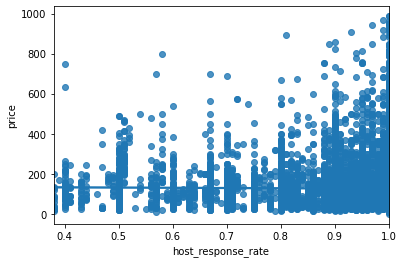

In [31]:
ax = sns.regplot(x='host_response_rate', y='price', data = df_for_numeric);

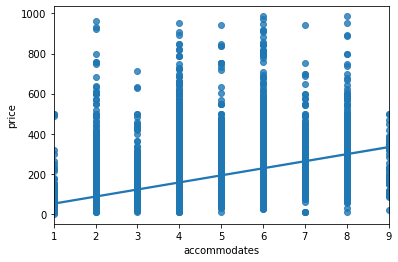

In [32]:
ax = sns.regplot(x='accommodates', y='price', data = df_for_numeric);

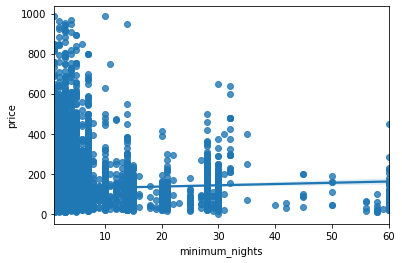

In [33]:
ax = sns.regplot(x='minimum_nights', y='price', data = df_for_numeric);

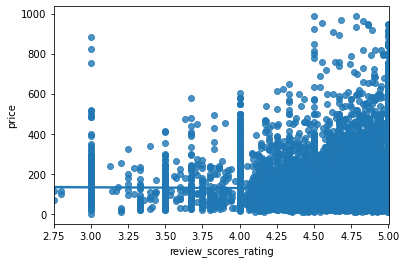

In [34]:
ax = sns.regplot(x='review_scores_rating', y="price", data = df_for_numeric);

In [35]:
# Let's set the price attribute value to near the average price of ~227
df_for_numeric_v1 = df_for_numeric[df_for_numeric['price'] < 227]

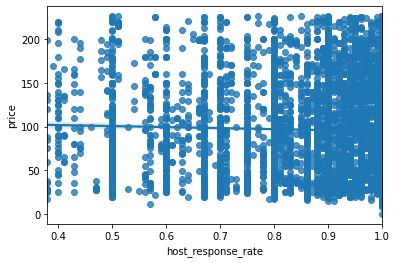

In [36]:
ax = sns.regplot(x='host_response_rate', y='price', data = df_for_numeric_v1);

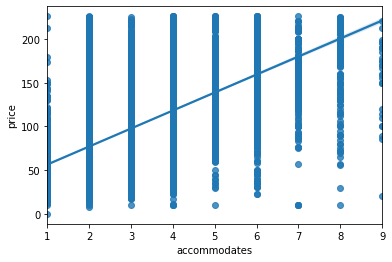

In [37]:
ax = sns.regplot(x='accommodates', y='price', data = df_for_numeric_v1);

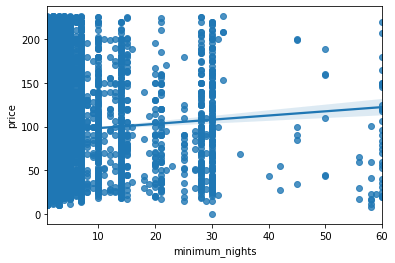

In [38]:
ax = sns.regplot(x='minimum_nights', y='price', data = df_for_numeric_v1);

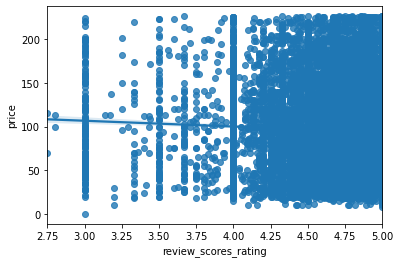

In [39]:
ax = sns.regplot(x='review_scores_rating', y='price', data = df_for_numeric_v1);

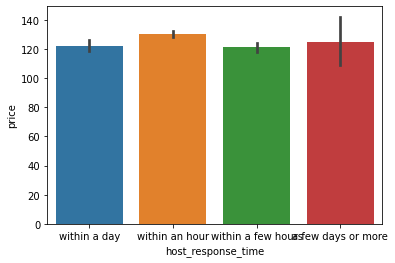

In [40]:
ax = sns.barplot(x='host_response_time', y='price', data = df_for_categorical);

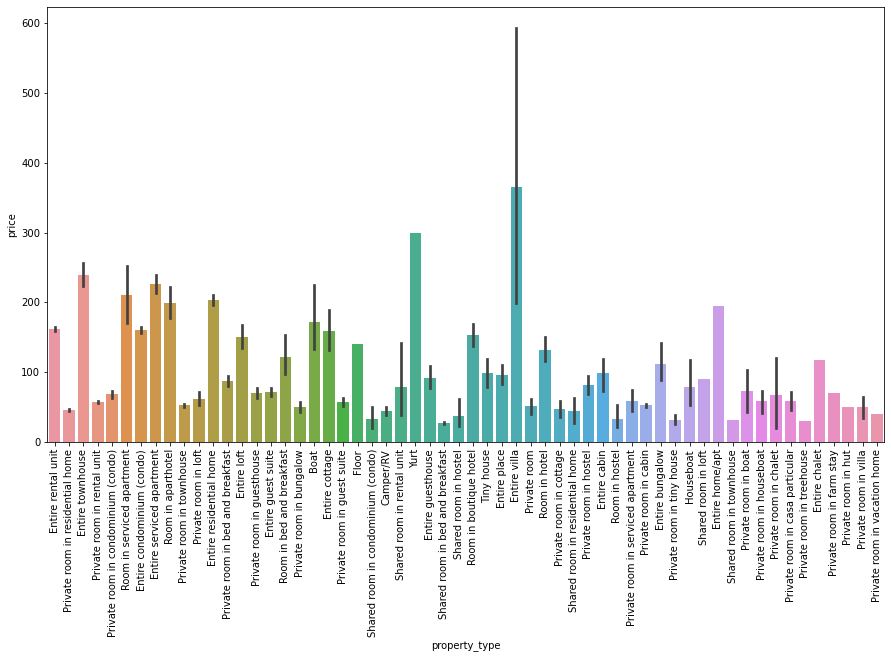

In [41]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
ax = sns.barplot(x='property_type', y='price', data = df_for_categorical);

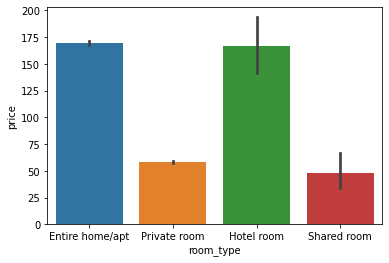

In [42]:
ax = sns.barplot(x='room_type', y='price', data = df_for_categorical);

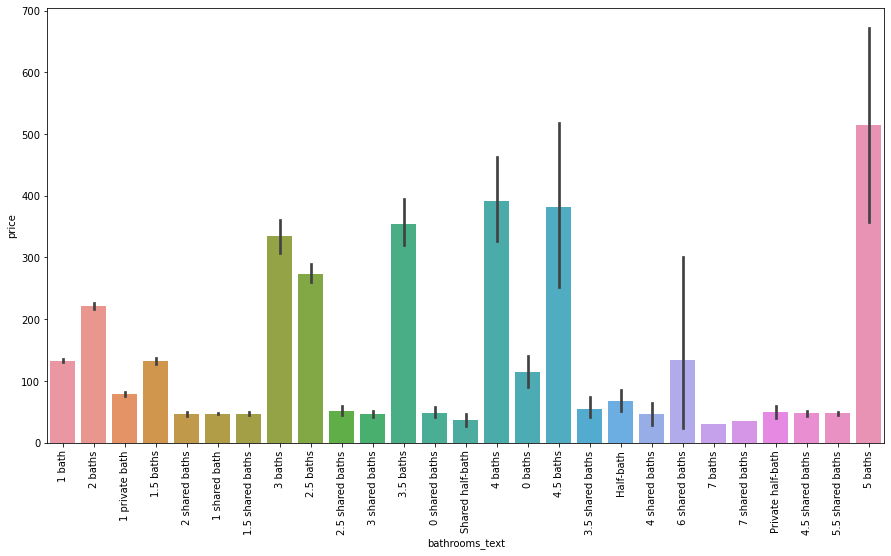

In [43]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
ax = sns.barplot(x='bathrooms_text', y='price', data = df_for_categorical);

In [44]:
# Let's select 100 records...
ldf2 = ldf.head(100)

In [45]:
# Let's add the data to a map to see how it looks...
m1 = GIS().map("London")
m1.zoom = 9
m1.center = [39,-117]
ldf2.spatial.plot(map_widget = m1)
m1

MapView(layout=Layout(height='400px', width='100%'))

# It was a great learning experience! I will use the template for other analysis. Thanks 
